In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
X_train = np.loadtxt('input.csv' ,  delimiter = ',')
Y_train = np.loadtxt('labels.csv' , delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter =',')

In [10]:
print('X train : ', X_train.shape)
print('Y train : ', Y_train.shape)
print('X test : ', X_test.shape)
print('Y test : ' , Y_test.shape)

X train :  (2000, 30000)
Y train :  (2000,)
X test :  (400, 30000)
Y test :  (400,)


In [5]:
len(X_train)

2000

In [7]:
x_train = X_train.reshape(len(X_train), 100, 100, 3)
x_test = X_test.reshape(len(X_test) , 100, 100, 3)

In [8]:
y_train = Y_train.reshape(len(Y_train), 1)
y_test = Y_test.reshape(len(Y_test), 1)

In [11]:
print('X train : ', x_train.shape)
print('Y train : ', y_train.shape)
print('X test : ', x_test.shape)
print('Y test : ' , y_test.shape)

X train :  (2000, 100, 100, 3)
Y train :  (2000, 1)
X test :  (400, 100, 100, 3)
Y test :  (400, 1)


In [14]:
#normalizing values (rgb)0-255 -> 0-1
print(x_train)
x_train = x_train/255.0
x_test = x_test/255.0

[[[[ 37.  39.  25.]
   [ 26.  24.   9.]
   [ 34.  25.  10.]
   ...
   [ 57.  44.  35.]
   [ 61.  47.  38.]
   [ 65.  51.  42.]]

  [[ 45.  43.  28.]
   [ 28.  25.   8.]
   [ 52.  40.  24.]
   ...
   [ 54.  41.  32.]
   [ 57.  43.  34.]
   [ 61.  47.  38.]]

  [[ 52.  45.  26.]
   [ 32.  24.   5.]
   [ 69.  54.  35.]
   ...
   [ 54.  40.  29.]
   [ 56.  42.  31.]
   [ 59.  45.  34.]]

  ...

  [[ 20.  39.   0.]
   [101. 125.  67.]
   [152. 182. 120.]
   ...
   [ 46.  41.  19.]
   [ 60.  55.  33.]
   [ 60.  55.  33.]]

  [[ 46.  65.   9.]
   [116. 140.  82.]
   [156. 186. 124.]
   ...
   [ 64.  60.  35.]
   [ 75.  71.  46.]
   [ 72.  68.  43.]]

  [[ 81. 100.  44.]
   [126. 150.  92.]
   [146. 176. 114.]
   ...
   [ 67.  63.  38.]
   [ 78.  74.  49.]
   [ 58.  54.  29.]]]


 [[[131. 128. 135.]
   [160. 157. 164.]
   [198. 192. 204.]
   ...
   [250. 249. 247.]
   [255. 255. 253.]
   [250. 249. 245.]]

  [[140. 137. 144.]
   [127. 124. 131.]
   [120. 114. 124.]
   ...
   [251. 253. 252.]
 

In [15]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

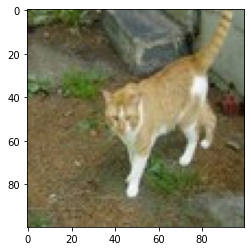

In [26]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

Model



In [28]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu' , input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu' ),
    Flatten(),
    Dense(64, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [51]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 15s 456ms/step - loss: 0.0034 - accuracy: 0.9995
Epoch 2/5
32/32 [==============================] - 14s 452ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 18s 567ms/step - loss: 9.7401e-04 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 18s 575ms/step - loss: 6.0229e-04 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 16s 485ms/step - loss: 4.7705e-04 - accuracy: 1.0000


In [53]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 58ms/step - loss: 1.8563 - accuracy: 0.6650


[1.8563357591629028, 0.6650000214576721]

In [37]:
model.save('model_cats&dogs')


INFO:tensorflow:Assets written to: model_cats&dogs\assets


INFO:tensorflow:Assets written to: model_cats&dogs\assets


In [39]:

model1 = keras.models.load_model('model_cats&dogs')

In [40]:
model1

In [41]:
model1.get_weights()

[array([[[[-2.13378184e-02,  7.60931969e-02,  1.77205861e-01,
           -1.16571546e-01, -1.00812964e-01, -3.92264761e-02,
            4.26101424e-02, -8.71201307e-02, -1.25392973e-01,
           -4.03303765e-02,  5.55651914e-03, -9.68818646e-03,
           -3.07741538e-02, -9.69346017e-02,  9.12436619e-02,
            1.27745286e-01,  1.18774444e-01, -6.12716079e-02,
            9.42390114e-02,  6.23339117e-02,  1.94375962e-02,
           -7.05097169e-02, -7.30005726e-02,  2.01772545e-02,
            1.46582338e-03,  2.98598912e-02,  7.00665936e-02,
            7.65427426e-02,  9.78110135e-02, -8.01546499e-02,
           -6.38980642e-02, -6.68166354e-02],
          [ 8.94161910e-02, -1.00046150e-01,  1.21066123e-01,
           -6.71773553e-02,  3.16778198e-02,  5.33333160e-02,
            3.07321027e-02,  1.38395101e-01, -1.31400198e-01,
           -8.11118856e-02, -1.07416913e-01, -7.19624683e-02,
           -2.03810800e-02,  5.33029437e-02, -1.18399769e-01,
           -9.89181325e-

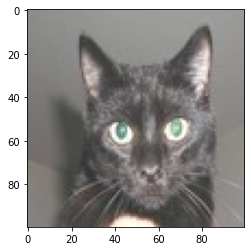

1/1 [==============================] - 0s 34ms/step


array([[0.9969511]], dtype=float32)

In [46]:
idx= random.randint(0, len(x_test))
plt.imshow(x_test[idx, :])
plt.show()
model.predict(x_test[idx,:].reshape(1,100,100,3))

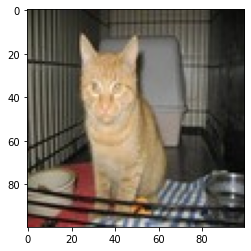

1/1 [==============================] - 0s 21ms/step
it is a  cat


In [49]:
idx= random.randint(0, len(x_test))
plt.imshow(x_test[idx, :])
plt.show()
y_p = model.predict(x_test[idx,:].reshape(1,100,100,3))

y_p = y_p >0.5

if(y_p == 0):
    pred = 'dog'
    print('it is a ', pred)
else:
    pred = 'cat'
    print('it is a ', pred)
